In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data

In [2]:
# read the csv-file
data = pd.read_csv('titanic.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create some new features

In [5]:
# Replace NaN values of the cabin
data.Cabin.fillna('U', inplace=True)

In [6]:
# Create "Deck" Feature from the first string of the cabin number
data['Deck'] = data['Cabin'].str[0]

In [7]:
# IsAlone if parch and Sibsp are 0
data['IsAlone'] = np.where(((data['SibSp'] == 0) & (data['Parch'] == 0)), True, False)
print(data[['PassengerId', 'SibSp', 'Parch', 'IsAlone']].head())

   PassengerId  SibSp  Parch  IsAlone
0            1      1      0    False
1            2      1      0    False
2            3      0      0     True
3            4      1      0    False
4            5      0      0     True


In [8]:
# Male and Female feature
data['Male'] = data['Sex'].map({'male': 1, 'female': 0}).astype(int)
data['Female'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)

### Drop the obsolete features

In [9]:
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

### Show the number of missing values for each variable

In [10]:
data.isnull().sum()[data.isnull().sum() > 0]

Age         177
Embarked      2
dtype: int64

# Simple Statistics and Plots
Absolute and relative frequencies

In [11]:
colors = ['#4D96FF', '#FF6B6B', '#6BCB77']

### Number of Persons surviving the disaster

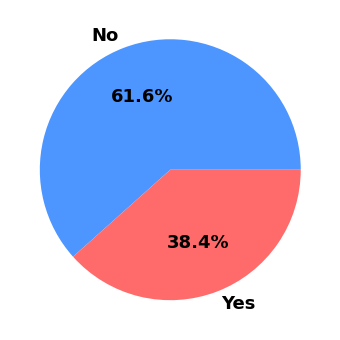

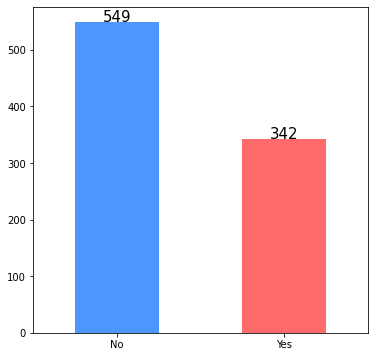

In [12]:
_ = plt.figure(figsize=(6, 6))

labels = 'No', 'Yes'
survived = data['Survived'].value_counts()
survived.plot.pie(labels=labels, autopct='%.1f%%', textprops={'fontsize': 18, 'weight': 'bold'}, colors=colors, ylabel='');

_ = plt.figure(figsize=(6, 6))

labels = 'No', 'Yes'
ax = data['Survived'].value_counts().plot.bar(rot=0, color=colors)

# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1],['No', 'Yes']);

### Sex of the Passengers

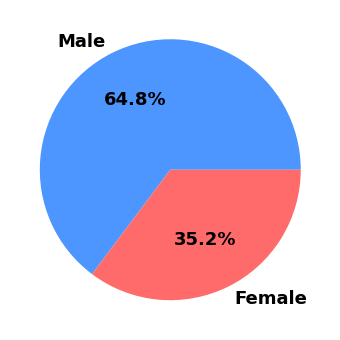

In [13]:
data[['Male', 'Female']].value_counts().plot.pie(colors=colors, figsize=(6,6),
                                                 labels=['Male', 'Female'],
                                                 textprops={'fontsize': 18, 'weight': 'bold'},
                                                 ylabel='',
                                                 autopct='%.1f%%'
                                                );

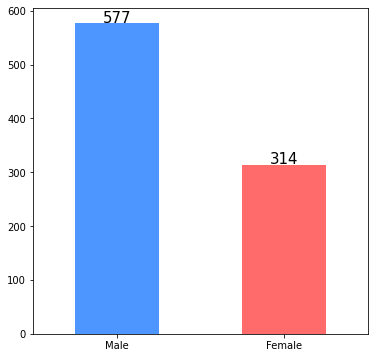

In [14]:
labels = 'Male', 'Female'
ax = data[['Male', 'Female']].value_counts().plot.bar(rot=0, color=colors, figsize=(6,6), xlabel='')

# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1],['Male', 'Female']);

### Passengers traveling alone

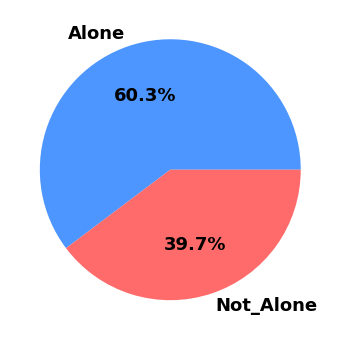

In [15]:
data['IsAlone'].value_counts().plot.pie(colors=colors, figsize=(6,6),
                                                 labels=['Alone', 'Not_Alone'],
                                                 textprops={'fontsize': 18, 'weight': 'bold'},
                                                 ylabel='',
                                                 autopct='%.1f%%'
                                                );

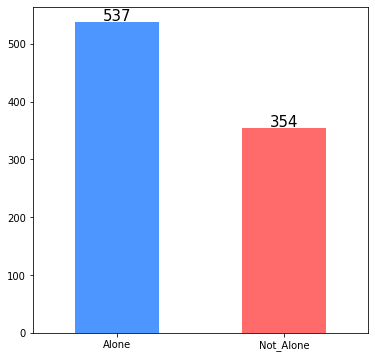

In [16]:
labels = 'Alone', 'Not_Alone'
ax = data['IsAlone'].value_counts().plot.bar(rot=0, color=colors, figsize=(6,6), xlabel='')

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1],labels);

### In which class where the Passengers

In [17]:
labels = data['Pclass'].value_counts().index.to_list()

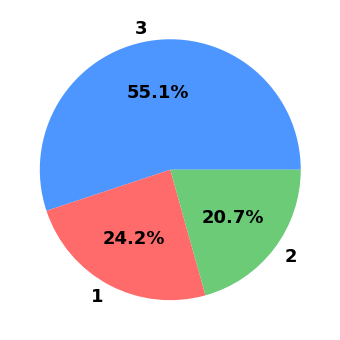

In [18]:
data['Pclass'].value_counts().plot.pie(colors=colors, figsize=(6,6),
                                       labels=labels, autopct='%.1f%%',
                                       ylabel='', textprops={'fontsize': 18, 'weight': 'bold'}
                                      );

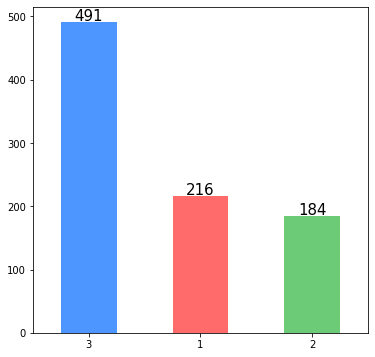

In [19]:
ax = data['Pclass'].value_counts().plot.bar(rot=0, color=colors, figsize=(6,6), xlabel='')

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1,2],labels);

### Places of Embarkment

In [20]:
labels = data['Embarked'].value_counts().index.to_list()

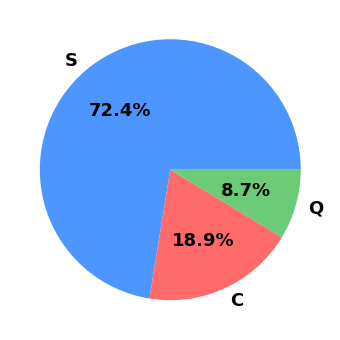

In [21]:
data['Embarked'].value_counts().plot.pie(colors=colors, figsize=(6,6),
                                       labels=labels, autopct='%.1f%%',
                                       ylabel='', textprops={'fontsize': 18, 'weight': 'bold'}
                                      );

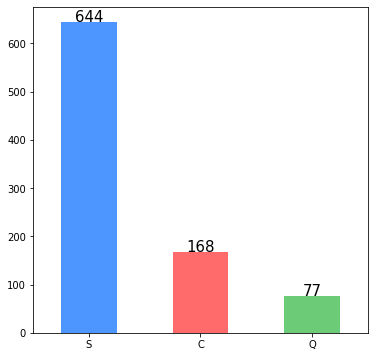

In [22]:
ax = data['Embarked'].value_counts().plot.bar(rot=0, color=colors, figsize=(6,6), xlabel='')

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1,2],labels);

### Age Distribution

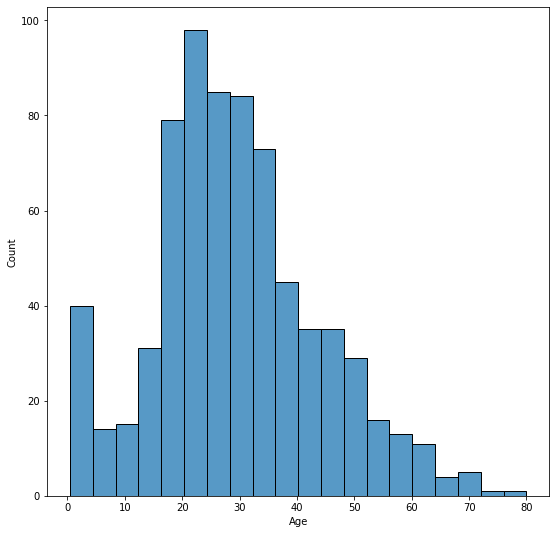

In [23]:
_ = plt.figure(figsize=(9, 9))

sns.histplot(data['Age'], bins=20);

## Probability of survival per dependant variable

In [24]:
# Given the Sex
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
# If the Passenger was alone
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,False,0.505650
1,True,0.303538


In [26]:
# For the Class the Passenger was in
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
# Replace the Characters with the full word
places_embarkement = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data['Embarked'].replace(places_embarkement, regex=True, inplace=True)

In [28]:
# For the Place of Embarkment
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957


## More Detailed Probabilities 
To see, if there exists any relation to these variables and the chance of survival

#### Check the joint frequencies, joint probabilities and conditional probabilities

### Sex

In [29]:
# Joint frequencies
pd.crosstab(index=data['Survived'], columns=[data['Male']==1, data['Female']==1], margins=True)

Male,False,True,All
Female,True,False,
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [30]:
# Joint probabilities
pd.crosstab(index=data['Survived'], columns=[data['Male']==1, data['Female']==1], normalize=True)

Male,False,True
Female,True,False
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [31]:
# Conditional probabilities
pd.crosstab(index=data['Survived'], columns=[data['Male']==1, data['Female']==1], normalize='columns')

Male,False,True
Female,True,False
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


### IsAlone

In [32]:
# Joint frequencies
pd.crosstab(index=data['Survived'], columns=data['IsAlone'], margins=True)

IsAlone,False,True,All
Survived,,,
0,175,374,549
1,179,163,342
All,354,537,891


In [33]:
# Joint probabilities
pd.crosstab(index=data['Survived'], columns=data['IsAlone'], normalize=True)

IsAlone,False,True
Survived,,
0,0.196409,0.419753
1,0.200898,0.182941


In [34]:
# Conditional probabilities
pd.crosstab(index=data['Survived'], columns=data['IsAlone'], normalize='columns')

IsAlone,False,True
Survived,,
0,0.49435,0.696462
1,0.50565,0.303538


### Passenger Class

In [35]:
# Joint frequencies
pd.crosstab(index=data['Survived'], columns=data['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [36]:
# Joint probabilities
pd.crosstab(index=data['Survived'], columns=data['Pclass'], normalize=True)

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


In [37]:
# Conditional probabilities
pd.crosstab(index=data['Survived'], columns=data['Pclass'], normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


### Places of Embarkment

In [38]:
# Joint frequencies
pd.crosstab(index=data['Survived'], columns=data['Embarked'], margins=True)

Embarked,Cherbourg,Queenstown,Southampton,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [39]:
# Joint probabilities
pd.crosstab(index=data['Survived'], columns=data['Embarked'], normalize=True)

Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
0,0.084364,0.052868,0.480315
1,0.104612,0.033746,0.244094


In [40]:
# Conditional probabilities
pd.crosstab(index=data['Survived'], columns=data['Embarked'], normalize='columns')

Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


### Age of the Passengers

In [41]:
# Check the statistics on the age
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
# Create Age boundaries
data['AgeClass'] = ['3_Old' if x >= 60 else ('2_Mid' if 30 <= x < 60 else '1_Young') for x in data['Age']]

In [43]:
# Joint frequencies
pd.crosstab(index=data['Survived'], columns=data['AgeClass'], margins=True)

AgeClass,1_Young,2_Mid,3_Old,All
Survived,,,,
0,353,177,19,549
1,208,127,7,342
All,561,304,26,891


In [44]:
# Joint probabilities
pd.crosstab(index=data['Survived'], columns=data['AgeClass'], normalize=True)

AgeClass,1_Young,2_Mid,3_Old
Survived,,,
0,0.396184,0.198653,0.021324
1,0.233446,0.142536,0.007856


In [45]:
# Conditional probabilities
pd.crosstab(index=data['Survived'], columns=data['AgeClass'], normalize='columns')

AgeClass,1_Young,2_Mid,3_Old
Survived,,,
0,0.629234,0.582237,0.730769
1,0.370766,0.417763,0.269231
